# Scratch notebook

Don't actually look at anything in this notebook

In [1]:
import pandas as pd
import scipy.io as spio
import matplotlib.pyplot as plt
import numpy as np

In [4]:
gene_to_eid = pd.read_csv('/ye/yelabstore2/mincheol/data/scrna-parameter-estimation/landed/gene_to_id.csv')

gene_list = pd.read_csv('/ye/yelabstore2/mincheol/data/scrna-parameter-estimation/landed/hg19/genes.tsv', sep='\t', header=None)
gene_list.columns = ['eid', 'gene']

In [18]:
# Retrive and filter mRNA matrix
gene_indices = gene_list[gene_list.eid.isin(gene_to_eid.eid)].index.values
gene_labels = gene_list[gene_list.eid.isin(gene_to_eid.eid)]\
    .merge(gene_to_eid, on='eid', how='left').gene_y.values
    


In [19]:
gene_labels

array(['CD45', 'CD8A', 'CD14', 'CD4', 'CD19'], dtype=object)

In [ ]:
mRNA_matrix = spio.mmread('/ye/yelabstore2/mincheol/data/scrna-parameter-estimation/landed/hg19/matrix.mtx').tocsr()

In [8]:
filtered_mRNA_matrix = mRNA_matrix[gene_indices, :].toarray()

In [9]:
filtered_mRNA_matrix

array([[1, 3, 2, ..., 3, 4, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [10]:
df_mRNA = pd.DataFrame(filtered_mRNA_matrix.T, columns=gene_labels)

In [13]:
gene_to_eid

,gene,eid
0,CD14,ENSG00000170458
1,CD19,ENSG00000177455
2,CD45,ENSG00000081237
3,CD4,ENSG00000010610
4,CD8A,ENSG00000153563


In [12]:
gene_labels

array(['PTPRC', 'CD8A', 'CD14', 'CD4', 'CD19'], dtype=object)

In [11]:
df_mRNA.head(5)

,PTPRC,CD8A,CD14,CD4,CD19
0,1,0,0,0,0
1,3,0,0,1,0
2,2,0,0,0,0
3,5,1,0,0,0
4,3,0,0,0,0


In [2]:
gene_to_eid = pd.read_csv('/ye/yelabstore2/mincheol/data/scrna-parameter-estimation/landed/gene_to_id.csv')

In [3]:
gene_to_eid

,gene,eid
0,CD14,ENSG00000170458
1,CD19,ENSG00000177455
2,CD45,ENSG00000081237
3,CD4,ENSG00000010610
4,CD8A,ENSG00000153563


In [19]:
genes = pd.read_csv('/ye/yelabstore2/george/CITE_Ab_Bakeoff/counts/hg19/CITESeq_mRNA/outs/filtered_gene_bc_matrices/hg19/genes.tsv', sep='\t', header=None)
genes.columns = ['eid', 'gene']

In [61]:
indices = genes[genes.eid.isin(gene_to_eid.eid)].index.values
gene_labels = genes[genes.eid.isin(gene_to_eid.eid)].gene.values

In [62]:
gene_labels

array(['PTPRC', 'CD8A', 'CD14', 'CD4', 'CD19'], dtype=object)

In [60]:
genes[genes.eid.isin(gene_to_eid.eid)]

,eid,gene
2576,ENSG00000081237,PTPRC
4064,ENSG00000153563,CD8A
9633,ENSG00000170458,CD14
20174,ENSG00000010610,CD4
25142,ENSG00000177455,CD19


In [30]:
mRNA_matrix = spio.mmread('/ye/yelabstore2/mincheol/data/scrna-parameter-estimation/landed/hg19/matrix.mtx').tocsr()

In [32]:
filtered_matrix = mRNA_matrix[indices, :]

In [63]:
mrna_matrix = pd.DataFrame(filtered_matrix.toarray().T, columns=gene_labels)

In [71]:
mrna_matrix.shape

(12684, 5)

In [66]:
mrna_matrix.head(5)

,PTPRC,CD8A,CD14,CD4,CD19
0,1,0,0,0,0
1,3,0,0,1,0
2,2,0,0,0,0
3,5,1,0,0,0
4,3,0,0,0,0


In [69]:
protein = pd.read_csv('/ye/yelabstore2/mincheol/data/scrna-parameter-estimation/landed/CITEseqADT.csv')

In [73]:
normed = pd.read_csv('/ye/yelabstore2/mincheol/data/scrna-parameter-estimation/landed/CITEseqADT.CLRnorm.csv')

In [81]:
temp = normed.set_index('Unnamed: 0').transpose()

In [ ]:
temp 

In [80]:
normed.set_index('Unnamed: 0').transpose()

Unnamed: 0,CD14,CD19,CD3,CD45,CD4,CD56,CD8a
AAAAAAAAAAAAAAAA,-1.233608,-1.377636,-0.980289,-1.206171,-0.984089,-0.876615,-1.468299
AAACCTGAGAACAATC,-0.290942,0.073461,-0.355574,-0.626883,-0.576562,-0.876615,0.016691
AAACCTGAGAAGAAGC,-0.865498,-1.377636,-0.128717,-0.449027,-0.338837,-0.876615,-0.073728
AAACCTGAGACAATAC,-0.556787,0.073461,-0.391481,-0.543420,-0.666844,0.641995,0.016691
AAACCTGAGACAGACC,-0.290942,0.073461,-0.355574,-0.433857,-0.078416,-0.876615,-0.371232
AAACCTGAGACAGGCT,-0.057497,0.073461,-0.466420,-0.715260,-0.338837,0.017936,-0.168251
AAACCTGAGAGCCCAA,0.509269,-0.210027,-0.505578,-0.418837,-0.764042,-0.876615,0.016691
AAACCTGAGAGCTGGT,-0.057497,0.755093,-0.128717,0.167517,1.167928,-0.876615,0.558936
AAACCTGAGAGGACGG,0.338303,0.073461,-0.505578,-0.527270,-0.576562,1.121714,-0.480658
AAACCTGAGAGGTAGA,-0.290942,-0.535235,2.767080,1.779716,3.035031,1.121714,-0.371232


In [76]:
normed_df = normed.transpose()

In [77]:
normed_df.head(5).

,0,1,2,3,4,5,6
Unnamed: 0,CD14,CD19,CD3,CD45,CD4,CD56,CD8a
AAAAAAAAAAAAAAAA,-1.23361,-1.37764,-0.980289,-1.20617,-0.984089,-0.876615,-1.4683
AAACCTGAGAACAATC,-0.290942,0.0734614,-0.355574,-0.626883,-0.576562,-0.876615,0.0166905
AAACCTGAGAAGAAGC,-0.865498,-1.37764,-0.128717,-0.449027,-0.338837,-0.876615,-0.0737281
AAACCTGAGACAATAC,-0.556787,0.0734614,-0.391481,-0.54342,-0.666844,0.641995,0.0166905


In [104]:
normed.shape

(7, 65000)

In [74]:
normed.head(2)

,Unnamed: 0,AAAAAAAAAAAAAAAA,AAACCTGAGAACAATC,AAACCTGAGAAGAAGC,AAACCTGAGACAATAC,AAACCTGAGACAGACC,AAACCTGAGACAGGCT,AAACCTGAGAGCCCAA,AAACCTGAGAGCTGGT,AAACCTGAGAGGACGG,...,TTTGTCATCGCCTGTT,TTTGTCATCGTGACAT,TTTGTCATCGTTGACA,TTTGTCATCTGCGTAA,TTTGTCATCTGGCGAC,TTTGTCATCTGGTGTA,TTTGTCATCTGTCTAT,TTTGTCATCTGTTTGT,TTTGTCATCTTGCAAG,TTTTCCTGTCCGTGAC
0,CD14,-1.233608,-0.290942,-0.865498,-0.556787,-0.290942,-0.057497,0.509269,-0.057497,0.338303,...,-0.556787,1.861025,-0.865498,-0.556787,-0.057497,-0.556787,-0.057497,-0.290942,0.150594,-1.233608
1,CD19,-1.377636,0.073461,-1.377636,0.073461,0.073461,0.073461,-0.210027,0.755093,0.073461,...,0.073461,-0.916597,-0.535235,0.073461,0.324727,-1.377636,-1.377636,-0.535235,0.324727,-1.377636


In [70]:
protein.shape

(7, 16383)

In [97]:
normed

,Unnamed: 0,AAAAAAAAAAAAAAAA,AAACCTGAGAACAATC,AAACCTGAGAAGAAGC,AAACCTGAGACAATAC,AAACCTGAGACAGACC,AAACCTGAGACAGGCT,AAACCTGAGAGCCCAA,AAACCTGAGAGCTGGT,AAACCTGAGAGGACGG,...,TTTGTCATCGCCTGTT,TTTGTCATCGTGACAT,TTTGTCATCGTTGACA,TTTGTCATCTGCGTAA,TTTGTCATCTGGCGAC,TTTGTCATCTGGTGTA,TTTGTCATCTGTCTAT,TTTGTCATCTGTTTGT,TTTGTCATCTTGCAAG,TTTTCCTGTCCGTGAC
0,CD14,-1.233608,-0.290942,-0.865498,-0.556787,-0.290942,-0.057497,0.509269,-0.057497,0.338303,...,-0.556787,1.861025,-0.865498,-0.556787,-0.057497,-0.556787,-0.057497,-0.290942,0.150594,-1.233608
1,CD19,-1.377636,0.073461,-1.377636,0.073461,0.073461,0.073461,-0.210027,0.755093,0.073461,...,0.073461,-0.916597,-0.535235,0.073461,0.324727,-1.377636,-1.377636,-0.535235,0.324727,-1.377636
2,CD3,-0.980289,-0.355574,-0.128717,-0.391481,-0.355574,-0.466420,-0.505578,-0.128717,-0.505578,...,-0.428409,-0.355574,-0.505578,-0.466420,-0.675222,-0.014925,-0.253458,-0.545955,-0.189589,-0.818809
3,CD45,-1.206171,-0.626883,-0.449027,-0.543420,-0.433857,-0.715260,-0.418837,0.167517,-0.527270,...,-0.527270,1.730537,-0.559745,-0.290026,-0.576250,-0.262842,-0.626883,-0.449027,-0.495482,1.499362
4,CD4,-0.984089,-0.576562,-0.338837,-0.666844,-0.078416,-0.338837,-0.764042,1.167928,-0.576562,...,-0.201960,0.483170,-0.764042,-0.764042,-0.492276,-0.413240,0.483170,-0.576562,-0.576562,-0.869304
5,CD56,-0.876615,-0.876615,-0.876615,0.641995,-0.876615,0.017936,-0.876615,-0.876615,1.121714,...,-0.876615,1.121714,-0.876615,0.017936,-0.876615,-0.876615,0.017936,-0.876615,-0.876615,-0.876615
6,CD8a,-1.468299,0.016691,-0.073728,0.016691,-0.371232,-0.168251,0.016691,0.558936,-0.480658,...,-0.718435,-0.267270,-0.168251,-0.371232,-0.718435,0.489594,0.186540,-0.718435,0.103346,-1.295171


In [120]:
'vv'.upper()

'VV'

In [123]:
adt_genes = [x.split('_')[0].upper() for x in protein.iloc[:, 0]]

In [124]:
adt_genes

['CD14', 'CD19', 'CD3', 'CD45', 'CD4', 'CD56', 'CD8A']

In [128]:
temp1 = protein.iloc[:, 1:].copy().transpose()
temp1.columns = adt_genes

In [131]:
gene_to_eid.gene

0    CD14
1    CD19
2    CD45
3     CD4
4    CD8A
Name: gene, dtype: object

In [133]:
temp1[gene_to_eid.gene].head(2)

,CD14,CD19,CD45,CD4,CD8A
AAAAAAAAAAAAAAAA,0,0,0,0,0
AAACCTGAGAACAATC,3,4,28,4,12


In [109]:
protein

,Unnamed: 0,AAAAAAAAAAAAAAAA,AAACCTGAGAACAATC,AAACCTGAGAAGAAGC,AAACCTGAGACAATAC,AAACCTGAGACAGACC,AAACCTGAGACAGGCT,AAACCTGAGAGCCCAA,AAACCTGAGAGCTGGT,AAACCTGAGAGGACGG,...,CACACTCCAGAGCCAA,CACACTCCAGATAATG,CACACTCCAGATCTGT,CACACTCCAGATGGGT,CACACTCCAGCTGCTG,CACACTCCAGCTTCGG,CACACTCCAGGATCGA,CACACTCCAGTCGTGC,CACACTCCAGTGGGAT,CACACTCCAGTTCCCT
0,CD14_(M5E2),0,3,1,2,3,4,7,4,6,...,5,5,5,6,8,2,53,6,7,5
1,CD19_(HIB19),0,4,0,4,4,4,3,7,4,...,2,4,3,1,61,2,4,4,4,1
2,CD3_(UCHT1),1,15,22,14,15,12,11,22,11,...,451,13,18,16,18,17,256,16,13,13
3,CD45_(2D1),0,28,39,33,40,23,41,89,34,...,425,36,31,41,306,55,1279,32,40,32
4,CD4_(RPA-T4),0,4,7,3,11,7,2,47,4,...,238,5,3,8,38,8,147,2,2,7
5,CD56_(NCAM_QA17A16),0,0,0,2,0,1,0,0,3,...,0,3,1,3,2,2,13,0,3,0
6,CD8a_(RPA-T8),0,12,11,12,8,10,12,19,7,...,9,8,6,5,7,13,50,10,10,9


In [98]:
sample = normed.values[6, :][1:].astype(np.int32)

In [108]:
sample[:16383].sum()

2938

In [106]:
sample[16383:]

8141

In [99]:
len(sample)

64999

In [101]:
max(sample)

10

In [103]:
(sample == 0.0).sum()

59338

(array([6.0299e+04, 1.2650e+03, 9.2900e+02, 1.3760e+03, 9.7600e+02,
        1.0600e+02, 2.0000e+01, 9.0000e+00, 8.0000e+00, 1.1000e+01]),
 array([-1. ,  0.1,  1.2,  2.3,  3.4,  4.5,  5.6,  6.7,  7.8,  8.9, 10. ]),
 <a list of 10 Patch objects>)

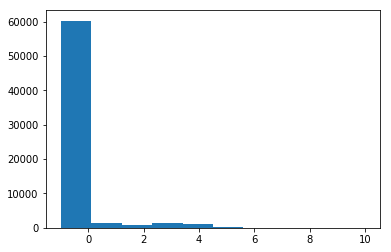

In [102]:
plt.hist(sample)